In [3]:
#Run time for all cells in notebook: 3-4 min

In [12]:
from functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns

In [5]:
#Features
cols = ['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH', 'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F', 'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH', 'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I', 'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH', 'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V', 'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH', 'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V', 'R3-PA8:VH', 'R3-PM8:V', 'R3-PA9:VH', 'R3-PM9:V', 'R3-PA10:IH', 'R3-PM10:I', 'R3-PA11:IH', 'R3-PM11:I', 'R3-PA12:IH', 'R3-PM12:I', 'R3:F', 'R3:DF', 'R3-PA:Z', 'R3-PA:ZH', 'R3:S', 'R4-PA1:VH', 'R4-PM1:V', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM3:V', 'R4-PA4:IH', 'R4-PM4:I', 'R4-PA5:IH', 'R4-PM5:I', 'R4-PA6:IH', 'R4-PM6:I', 'R4-PA7:VH', 'R4-PM7:V', 'R4-PA8:VH', 'R4-PM8:V', 'R4-PA9:VH', 'R4-PM9:V', 'R4-PA10:IH', 'R4-PM10:I', 'R4-PA11:IH', 'R4-PM11:I', 'R4-PA12:IH', 'R4-PM12:I', 'R4:F', 'R4:DF', 'R4-PA:Z', 'R4-PA:ZH', 'R4:S', 'control_panel_log1', 'control_panel_log2', 'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4']

#Importing data for classification using function from fomlads library
inputs, targets, input_cols, classes = import_for_classification('power_clean.csv', input_cols=cols, target_col='marker')

dataframe.columns = Index(['Unnamed: 0', 'R1-PA10:IH', 'R1-PA11:IH', 'R1-PA12:IH', 'R1-PA1:VH',
       'R1-PA2:VH', 'R1-PA3:VH', 'R1-PA4:IH', 'R1-PA5:IH', 'R1-PA6:IH',
       ...
       'id', 'marker', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log',
       'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4'],
      dtype='object', length=131)
input_cols = ['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH', 'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F', 'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH', 'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I

In [6]:
#Splitting the data into train and test sets using functions from fomlads library, see functions.py for documentation
N = inputs.shape[0]
train_filter, test_filter = train_and_test_filter(N, 0.1)
train_inputs, train_targets, test_inputs, test_targets = train_and_test_partition(inputs, targets, train_filter, test_filter)

In [7]:
#Selecting the svc model from SVM library in scikit learn
#Specifying hyperparameters derived from cross validation (separate file)
svc = SVC(C=10, verbose=0, gamma=0.0001)

In [8]:
#Fitting the model to training data
svc.fit(train_inputs, train_targets)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=0)

In [9]:
#Predicting targets using trained model on test data
pred_targets = svc.predict(test_inputs)
#Generating model F1 score
svm_f1 = f1_score(test_targets, pred_targets, average=None)
svm_f1_average = f1_score(test_targets, pred_targets, average='macro')

0.6959380758553511


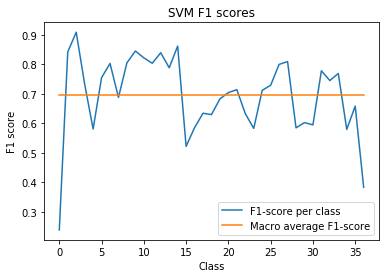

In [10]:
#Average score across classes
print(svm_f1_average)

#Performance across classes visualised
plt.figure()
plt.plot([i for i in range(37)], svm_f1, label='F1-score per class')
plt.plot([i for i in range(37)], [svm_f1_average for i in range(37)], label='Macro average F1-score')
plt.title("SVM F1 scores")
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.legend(loc = 'lower right')
plt.show()

Text(69.0, 0.5, 'Class')

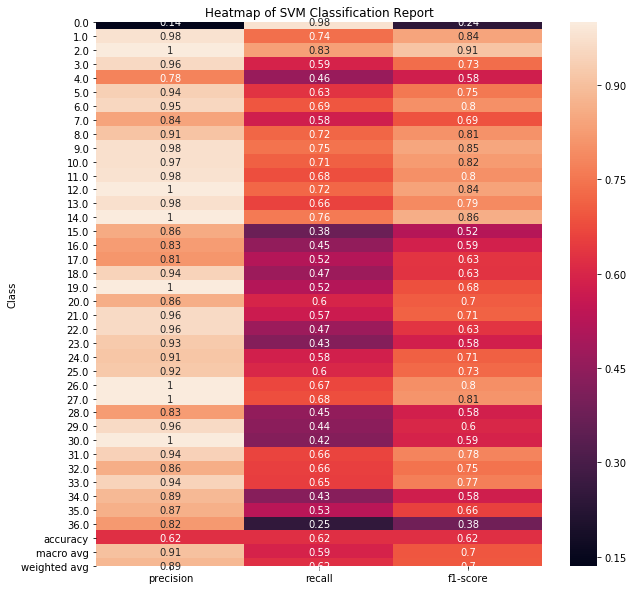

In [13]:
classreport = classification_report(test_targets, pred_targets, output_dict=True)

plt.figure(figsize=(10, 10))
sns.heatmap(pd.DataFrame(classreport).iloc[:-1, :].T, annot=True)
plt.title("Heatmap of SVM Classification Report")
plt.ylabel("Class")